# 使用Iris資料集實作PCA降維 
---
by 10527221 彭千湖

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

# load Iris datasets
iris = datasets.load_iris()

from sklearn.decomposition import PCA

In [2]:
for key,value in iris.items() :
    try:
        print (key,value.shape)
    except:
        print (key)
print(iris['feature_names'])
print(iris.data[:4])

data (150, 4)
target (150,)
target_names (3,)
DESCR
feature_names
filename
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]]


In [3]:
# original iris data have 4 features
iris_4d = np.array(iris.data)

# find the mean
meanVals = np.mean(iris_4d, axis= 0) 

# mean remove
meanRemoveVals = iris_4d - meanVals

# find Covariance
covVals = np.cov(meanRemoveVals, rowvar=0)

# find Eigenvector and Eigenvalue
eigVals, eigVects = np.linalg.eig(covVals)

# sort from smallest to largest
eigValIndex = np.argsort(eigVals)

# cut off unwanted dimensions
eigValIndex = eigValIndex[:-3:-1]

# reorganize eig vects largest to smallest
redEigVects = eigVects[:,eigValIndex]


iris_2d = np.dot(meanRemoveVals, redEigVects)
iris_2d[:4]

array([[-2.68412563, -0.31939725],
       [-2.71414169,  0.17700123],
       [-2.88899057,  0.14494943],
       [-2.74534286,  0.31829898]])

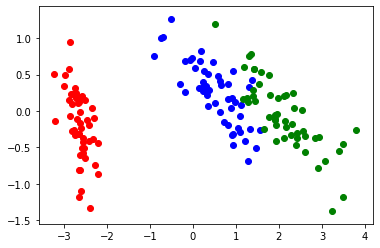

In [4]:
y = iris.target

red_x,red_y=[],[]
blue_x,blue_y=[],[]
green_x,green_y=[],[]


for i in range(len(iris_2d)):
    if y[i] ==0:
        red_x.append(iris_2d[i][0])
        red_y.append(iris_2d[i][1])

    elif y[i]==1:
        blue_x.append(iris_2d[i][0])
        blue_y.append(iris_2d[i][1])

    else:
        green_x.append(iris_2d[i][0])
        green_y.append(iris_2d[i][1])

plt.scatter(red_x,red_y,c='r')
plt.scatter(blue_x,blue_y,c='b')
plt.scatter(green_x,green_y,c='g')
plt.show()